**Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!**

# Predicting...

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle

from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [53]:
df = pd.read_csv('datasets/dc-residential-properties/raw_residential_data.csv')

In [54]:
df.shape

(107154, 39)

In [55]:
df = df.sample(n=100000)

In [56]:
df.head()

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,...,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
21335,21336,1290 0280,3.0,1.0,7.0,Warm Cool,Y,1.0,7.0,3.0,...,Common Brick,11.0,Slate,6.0,Hardwood,2.0,2.0,12,1208,2018-07-22T18:01:43.000Z
37981,37982,2295 0005,3.0,1.0,7.0,Warm Cool,Y,1.0,7.0,3.0,...,Common Brick,11.0,Slate,6.0,Hardwood,1.0,1.0,12,5111,2018-07-22T18:01:43.000Z
73086,73087,3812 0016,2.0,0.0,7.0,Warm Cool,Y,1.0,8.0,4.0,...,Aluminum,1.0,Comp Shingle,3.0,Wood Floor,1.0,0.0,13,3275,2018-07-22T18:01:43.000Z
57479,60480,3213 0083,1.0,0.0,13.0,Hot Water Rad,N,1.0,9.0,4.0,...,Common Brick,11.0,Slate,6.0,Hardwood,1.0,0.0,11,2565,2018-07-22T18:01:43.000Z
68342,68343,3684 0041,1.0,0.0,7.0,Warm Cool,Y,1.0,6.0,3.0,...,Common Brick,6.0,Metal- Sms,11.0,Hardwood/Carp,1.0,0.0,11,1600,2018-07-22T18:01:43.000Z


In [57]:
df.columns

Index(['OBJECTID', 'SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC',
       'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES',
       'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM',
       'STYLE', 'STYLE_D', 'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D', 'CNDTN',
       'CNDTN_D', 'EXTWALL', 'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL',
       'INTWALL_D', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM'],
      dtype='object')

In [58]:
features = df[['BATHRM', 'HF_BATHRM', 'HEAT', 'AC',
               'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES',
               'SALEDATE', 'PRICE', 'STYLE', 'STYLE_D', 'STRUCT', 'STRUCT_D',
               'GRADE', 'GRADE_D', 'CNDTN', 'CNDTN_D', 'EXTWALL', 'EXTWALL_D',
               'ROOF', 'ROOF_D', 'INTWALL', 'INTWALL_D', 'KITCHENS', 'FIREPLACES',
               'LANDAREA']]

In [59]:
features.tail()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,CNDTN_D,EXTWALL,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,LANDAREA
84486,2.0,0.0,1.0,Y,1.0,6.0,3.0,1941.0,2012.0,1964,...,Good,14.0,Common Brick,2.0,Built Up,11.0,Hardwood/Carp,1.0,0.0,1040
77371,1.0,1.0,13.0,N,1.0,6.0,3.0,1939.0,NaN,1957,...,Average,14.0,Common Brick,11.0,Slate,6.0,Hardwood,1.0,1.0,4880
59794,2.0,1.0,13.0,N,2.0,9.0,4.0,1907.0,2015.0,1957,...,Average,14.0,Common Brick,11.0,Slate,6.0,Hardwood,2.0,1.0,1500
41950,4.0,0.0,7.0,Y,4.0,16.0,6.0,1900.0,2005.0,1970,...,Good,14.0,Common Brick,2.0,Built Up,6.0,Hardwood,4.0,4.0,2162
96301,2.0,1.0,13.0,Y,1.0,8.0,4.0,1960.0,1982.0,1971,...,Average,14.0,Common Brick,1.0,Comp Shingle,11.0,Hardwood/Carp,1.0,2.0,5750


In [60]:
features.isnull().sum()

BATHRM           24
HF_BATHRM        25
HEAT             24
AC               24
NUM_UNITS        24
ROOMS            39
BEDRM            28
AYB              12
YR_RMDL       53849
EYB               0
STORIES          68
SALEDATE          0
PRICE         17967
STYLE            24
STYLE_D          24
STRUCT           24
STRUCT_D         24
GRADE            24
GRADE_D          24
CNDTN            24
CNDTN_D          24
EXTWALL          24
EXTWALL_D        24
ROOF             24
ROOF_D           24
INTWALL          24
INTWALL_D        24
KITCHENS         25
FIREPLACES       25
LANDAREA          0
dtype: int64

In [61]:
# Looks like there are only a few rows with null outside of YR_RMDL and PRICE..

features[features.drop(['YR_RMDL', 'PRICE'],axis=1).isnull().any(axis=1)].shape

(98, 30)

In [62]:
# Let's make sure...

drop_rows = features[features.drop(['YR_RMDL', 'PRICE'],axis=1).isnull().any(axis=1)].index
features.drop(drop_rows, axis=0).isnull().sum()

BATHRM            0
HF_BATHRM         0
HEAT              0
AC                0
NUM_UNITS         0
ROOMS             0
BEDRM             0
AYB               0
YR_RMDL       53762
EYB               0
STORIES           0
SALEDATE          0
PRICE         17966
STYLE             0
STYLE_D           0
STRUCT            0
STRUCT_D          0
GRADE             0
GRADE_D           0
CNDTN             0
CNDTN_D           0
EXTWALL           0
EXTWALL_D         0
ROOF              0
ROOF_D            0
INTWALL           0
INTWALL_D         0
KITCHENS          0
FIREPLACES        0
LANDAREA          0
dtype: int64

In [63]:
# Great, let's take those out...

features = features.drop(drop_rows, axis=0)

# ...call non-remodeled houses '0' and drop houses without prices...

features['YR_RMDL'] = features['YR_RMDL'].fillna(0)
features = features.dropna(subset=['PRICE'])

In [64]:
features.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'STYLE',
       'STYLE_D', 'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D', 'CNDTN', 'CNDTN_D',
       'EXTWALL', 'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL', 'INTWALL_D',
       'KITCHENS', 'FIREPLACES', 'LANDAREA'],
      dtype='object')

In [65]:
# What else can we do about categorical data?
# Let's drop a few things...

features = features.drop(['STYLE_D', 'STRUCT_D', 'EXTWALL_D', 'ROOF_D', 'INTWALL_D'], axis=1)

In [66]:
# Let's replace and encode a few things...

features['AC'] = features['AC'].replace('Y', 1)
features['AC'] = features['AC'].replace('N', 0)

features['GRADE_D'] = features['GRADE_D'].replace('No Data', 0)
features['GRADE_D'] = features['GRADE_D'].replace('Low Quality', 1)
features['GRADE_D'] = features['GRADE_D'].replace('Fair Quality', 2)
features['GRADE_D'] = features['GRADE_D'].replace('Average', 3)
features['GRADE_D'] = features['GRADE_D'].replace('Good Quality', 4)
features['GRADE_D'] = features['GRADE_D'].replace('Above Average', 5)
features['GRADE_D'] = features['GRADE_D'].replace('Very Good', 6)
features['GRADE_D'] = features['GRADE_D'].replace('Excellent', 7)
features['GRADE_D'] = features['GRADE_D'].replace('Superior', 8)
features['GRADE_D'] = features['GRADE_D'].replace('Exceptional-D', 9)
features['GRADE_D'] = features['GRADE_D'].replace('Exceptional-C', 10)
features['GRADE_D'] = features['GRADE_D'].replace('Exceptional-B', 11)
features['GRADE_D'] = features['GRADE_D'].replace('Exceptional-A', 12)

features['CNDTN_D'] = features['CNDTN_D'].replace('Default', 0)
features['CNDTN_D'] = features['CNDTN_D'].replace('Poor', 1)
features['CNDTN_D'] = features['CNDTN_D'].replace('Fair', 2)
features['CNDTN_D'] = features['CNDTN_D'].replace('Average', 3)
features['CNDTN_D'] = features['CNDTN_D'].replace('Good', 4)
features['CNDTN_D'] = features['CNDTN_D'].replace('Very Good', 5)
features['CNDTN_D'] = features['CNDTN_D'].replace('Excellent', 6)

In [67]:
# Extracting month and year from sale date

import datetime

features['SALEDATE'] = pd.to_datetime(features['SALEDATE'])
features['SALEYEAR'], features['SALEMONTH'] = features['SALEDATE'].dt.year, features['SALEDATE'].dt.month

features = features.drop(['SALEDATE'], axis=1)

In [68]:
features.dtypes

BATHRM        float64
HF_BATHRM     float64
HEAT          float64
AC             object
NUM_UNITS     float64
ROOMS         float64
BEDRM         float64
AYB           float64
YR_RMDL       float64
EYB             int64
STORIES       float64
PRICE         float64
STYLE         float64
STRUCT        float64
GRADE         float64
GRADE_D         int64
CNDTN         float64
CNDTN_D         int64
EXTWALL       float64
ROOF          float64
INTWALL       float64
KITCHENS      float64
FIREPLACES    float64
LANDAREA        int64
SALEYEAR        int64
SALEMONTH       int64
dtype: object

In [69]:
features.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,CNDTN,CNDTN_D,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,SALEMONTH
21335,3.0,1.0,7.0,1,1.0,7.0,3.0,1936.0,2015.0,1987,...,3.0,3,14.0,11.0,6.0,2.0,2.0,1208,2017,9
37981,3.0,1.0,7.0,1,1.0,7.0,3.0,1931.0,1992.0,1969,...,5.0,5,14.0,11.0,6.0,1.0,1.0,5111,2017,12
73086,2.0,0.0,7.0,1,1.0,8.0,4.0,1978.0,0.0,1986,...,3.0,3,19.0,1.0,3.0,1.0,0.0,3275,1900,1
57479,1.0,0.0,13.0,0,1.0,9.0,4.0,1926.0,1984.0,1950,...,3.0,3,14.0,11.0,6.0,1.0,0.0,2565,1999,4
68342,1.0,0.0,7.0,1,1.0,6.0,3.0,1938.0,0.0,1957,...,3.0,3,14.0,6.0,11.0,1.0,0.0,1600,2002,3


In [70]:
X = features.drop(['PRICE'], axis=1)
y = features['PRICE']

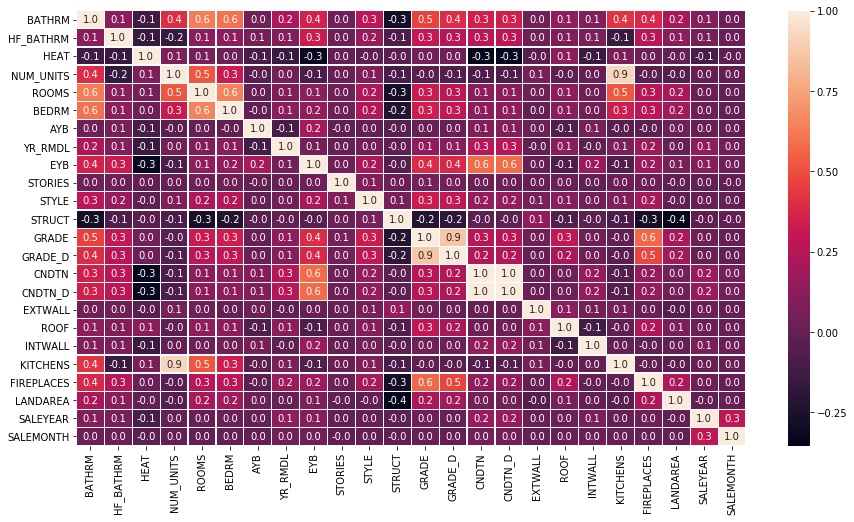

In [71]:
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(X.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73742, 25) (73742,)
(8194, 25) (8194,)


**Random Forest Regressor**

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor(n_estimators=500)

rfr = RandomForestRegressor()
rfr.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
GRADE,0.117325
EYB,0.103639
SALEYEAR,0.100288
GRADE_D,0.088071
LANDAREA,0.088031
AYB,0.074864
BATHRM,0.067166
YR_RMDL,0.049631
ROOMS,0.043361
SALEMONTH,0.036119


In [85]:
X = features.drop(['PRICE', 'INTWALL', 'STYLE', 'KITCHENS', 'AC', 'NUM_UNITS'], axis=1)
y = features['PRICE']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73742, 25) (73742,)
(8194, 25) (8194,)


In [86]:
score = cross_val_score(rfr, X, y, cv=5)
print(score)

[0.48036628 0.3836273  0.42882447 0.45378979 0.32767254]


**Boosting Model**

In [104]:
model = ensemble.GradientBoostingRegressor(n_estimators=400, random_state=0, max_features=12,
                                  max_depth=5, learning_rate=0.1, subsample=1)
model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=12,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
model.score(X, y)

0.7261171218819513

**SKLearn MLPClassifier**

In [115]:
mlp = MLPRegressor(random_state=0, alpha=1e-5, hidden_layer_sizes=(100, 50, 25))

mlp.fit(X, y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [117]:
mlp.score(X, y)

0.3483076711462017